***
# Data Modelling
Capstone Project - Ali Sehpar Shikoh
***

<b> Previous Notebook: CombiningDataSets-AdditionalEDA

<b> Next Notebook: KeyFindings

This notebook deals with the implementation, evaluation and interpretation of various models on the final dataset obtained after combining various refined datasets. In total 4 different models will be implemented. Later on two of the models will be selected for interpretation.

Importing key packages and libraries to be used in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import decomposition, datasets
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
import shap

C:\Users\User\anaconda3\envs\CapstoneProject\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Preprocessing Data

Importing the combined dataframe.

In [2]:
df1 = pd.read_csv('Data\CombinedandRefinedDataFrame.csv')
df1

,Area Code,Area,Year,Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),Crop Removal (tonnes),Roundwood Production (m3),Total Population (X 1000),Temperature Change (°C),Total Yield (hg/ha)
0,2,Afghanistan,1961,5257236.40,5.624520e+07,1000.0,100.0,0.0,65189.7400,0.00,74154.2000,1354291.0,9169.410,-0.121,5.831727e+05
1,2,Afghanistan,1962,5259200.50,5.704647e+07,1000.0,100.0,0.0,67127.8800,0.00,75966.9064,1371568.0,9351.441,-0.171,6.065209e+05
2,2,Afghanistan,1963,5471475.75,5.859424e+07,1000.0,100.0,0.0,68986.5110,0.00,71302.8675,1414937.0,9543.205,0.841,6.053449e+05
3,2,Afghanistan,1964,5597970.00,5.980591e+07,1000.0,100.0,0.0,70987.6918,0.00,76253.3200,1533399.0,9744.781,-0.779,5.682812e+05
4,2,Afghanistan,1965,5734080.00,6.162054e+07,1000.0,100.0,0.0,72446.0625,0.00,77364.1100,1596956.0,9956.320,-0.254,6.088503e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,181,Zimbabwe,2015,3529759.20,1.520726e+07,42600.0,23000.0,13000.0,18855.9000,6420.84,28149.5661,9744786.0,13814.629,1.226,1.678980e+06
10531,181,Zimbabwe,2016,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,26201.6590,9806850.0,14030.331,1.470,1.728082e+06
10532,181,Zimbabwe,2017,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,32794.6510,9801056.0,14236.595,0.443,1.654091e+06
10533,181,Zimbabwe,2018,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,31543.9736,9920009.0,14438.802,0.747,1.734386e+06


It is common to preprocess categorical data to maximize the number of numeric columns and achieve higher R2 score and accuracy. One can make use of dummy variables or one-hot encoding to represent each category as a separate column with 0 or 1 values, where value 1 signals that is was the original category.

Implementing One Hot Encoding

Instantiating the OneHotEncoder. Later fitting the OneHotEncoder to the Area column and transforming.

In [3]:
ohe = OneHotEncoder()
Area = pd.DataFrame(df1['Area'])
encoded = ohe.fit_transform(Area)
encoded

<10535x204 sparse matrix of type '<class 'numpy.float64'>'
	with 10535 stored elements in Compressed Sparse Row format>

Converting from sparse matrix to dense matrix.

In [4]:
dense_array = encoded.toarray()
dense_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

To get the corresponding column names for the above mentioned one-hot-encoded array, one can access one.categories_ attribute of the fitted OneHotEncoder

In [5]:
ohe.categories_[0]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Taiwan Province of',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Eswat

As seen, the categories (countries) in the 'Area' column are converted into individual columns.

Putting the categories into a dataframe to get column names and showing the encoded dataframe.

In [6]:
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_[0], dtype=int)
encoded_df

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yugoslav SFR,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Combining the encoded dataframe with the original one.

In [7]:
df2 = df1.reset_index()
df2 = df2.join(encoded_df)
df2 = df2.drop(['index'], 1)
df2

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


,Area Code,Area,Year,Livestock units,Manure applied to soil - N content (kg),Nitrogen Usage (Tonnes),Phosphate Usage (Tonnes),Potash Usage (Tonnes),Atmospheric Deposition (tonnes),Biological Fixation (tonnes),...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yugoslav SFR,Zambia,Zimbabwe
0,2,Afghanistan,1961,5257236.40,5.624520e+07,1000.0,100.0,0.0,65189.7400,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2,Afghanistan,1962,5259200.50,5.704647e+07,1000.0,100.0,0.0,67127.8800,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,1963,5471475.75,5.859424e+07,1000.0,100.0,0.0,68986.5110,0.00,...,0,0,0,0,0,0,0,0,0,0
3,2,Afghanistan,1964,5597970.00,5.980591e+07,1000.0,100.0,0.0,70987.6918,0.00,...,0,0,0,0,0,0,0,0,0,0
4,2,Afghanistan,1965,5734080.00,6.162054e+07,1000.0,100.0,0.0,72446.0625,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,181,Zimbabwe,2015,3529759.20,1.520726e+07,42600.0,23000.0,13000.0,18855.9000,6420.84,...,0,0,0,0,0,0,0,0,0,1
10531,181,Zimbabwe,2016,3557201.40,1.655674e+07,58100.0,39000.0,33200.0,18855.9000,6500.15,...,0,0,0,0,0,0,0,0,0,1
10532,181,Zimbabwe,2017,3518697.90,1.395568e+07,65000.0,41400.0,40000.0,18855.9000,7971.18,...,0,0,0,0,0,0,0,0,0,1
10533,181,Zimbabwe,2018,3556852.90,1.357950e+07,50100.0,45800.0,36900.0,18855.9000,9717.04,...,0,0,0,0,0,0,0,0,0,1


### Model Implementation

Defining dependant and independent variables and dividing the two datasets into test and train sets.

In [8]:
X = df2.drop(["Total Yield (hg/ha)", 'Area', 'Area Code'], 1)
y = df2['Total Yield (hg/ha)']

split = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Splitting X_train dataset to a smaller training and validation set.

The later sections will deal with model fitting and evaluation.

<u> <b>Linear Regression Models

<u> Simple Linear Regression

Lets start with simple linear regression model.

Although we could use use a simpler method to implement simple linear model can be adopted, simpler to the one mentioned below, however grid search is implemented. The grid search code for linear regression acted as a baseline to try out various things. When implementing simple linear regression model via gird search, no parameters were optimized as seen later on.

In [210]:
# LinearRegSimple = LinearRegression()
#LinearRegSimple.fit(X_train, y_train)
 
# print(f"DT R^2 score on training set: {LinearRegSimple.score(X_train, y_train)}")
# print(f"DT R^2 score on test set: {LinearRegSimple.score(X_test, y_test)}")

Before model fitting lets look at the hyperparameter that can be optimized.

In [211]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

Creating the pipeline.

Since we would like to see the significance of each of our features therefore we won't be doing any dimension reduction via principal component analysis.

In [212]:
S_Lin_estimators = [('normalise', StandardScaler()), # scaling is required to implement linear regression.
                        ('model', LinearRegression())
                        ]
S_Lin_pipe = Pipeline(S_Lin_estimators)

S_Lin_pipe

Pipeline(steps=[('normalise', StandardScaler()), ('model', LinearRegression())])

Defining the hyperparameter to optimize. Since we are implementing the simplest form of linear regression, therefore we will only be specifing n_jobs hyperparameter in S_Lin_Param.

In [213]:
S_Lin_Param = {'model__n_jobs': [-1]}

Passing in the parameters to optimize to GridSearchCV. Also specifying cross validation steps equal to 5.

In [214]:
S_grid_lin= GridSearchCV(S_Lin_pipe, param_grid = S_Lin_Param, verbose=1, cv=5)
#Takes 0.1 second.

Fitting 'S_grid_lin' onto train sets.

In [215]:
S_grid_lin.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalise', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__n_jobs': [-1]}, verbose=1)

Getting R2 scores for the train and test sets.

In [216]:
S_grid_lin.score(X_train, y_train)

0.8396858230613324

In [217]:
S_grid_lin.score(X_test, y_test)

0.8301387279800381

As seen the notebook related to combining of various datasets, strong co-linearity exists between various variables, therefore it is suggested to implement linear regression with 'Ridge' and 'Lasso' regularization and see what R2 value do we get.

Starting off with 'Ridge'.

Looking at hyperparameters one can optimize.

In [87]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

We will be considering 'alpha' and 'max_iter' hyperparameters. Not dimension reduction via PCA is implemented.

Creating a Ridge regression pipeline.

In [88]:
Ridge_estimators = [('normalise', StandardScaler()),
                        ('model', Ridge())
                        ]
Ridge_pipe = Pipeline(Ridge_estimators)

Ridge_pipe

Pipeline(steps=[('normalise', StandardScaler()), ('model', Ridge())])

Defining the hyperparameter to optimize. As stated above we will be optimizing only alpha and max iteration hyperparameters.

In [89]:
Ridge_Param = { 'model': [Ridge()], 'model__alpha': np.arange(10, 30, 1), 'model__max_iter': np.arange(1, 1002, 50)}

Passing in the parameters to optimize to GridSearchCV. Also specifying cross validation steps equal to 5.

In [90]:
Grid_ridge= GridSearchCV(Ridge_pipe, param_grid = Ridge_Param, verbose=1, cv=5)

Fitting 'Grid_ridge' onto train sets.

In [91]:
Grid_ridge.fit(X_train, y_train)
#Takes 1 minute.

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalise', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model': [Ridge(alpha=21, max_iter=1)],
                         'model__alpha': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                         'model__max_iter': array([   1,   51,  101,  151,  201,  251,  301,  351,  401,  451,  501,
        551,  601,  651,  701,  751,  801,  851,  901,  951, 1001])},
             verbose=1)

Getting R2 scores for the train and test sets.

In [92]:
Grid_ridge.score(X_train, y_train)

0.8396240892488572

In [93]:
Grid_ridge.score(X_test, y_test)

0.8300290220152631

Looking at the key parameters that can be plotted using cv_results.

In [94]:
Grid_ridge.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model', 'param_model__alpha', 'param_model__max_iter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Creating a data frame so we can use seaborn for visualization. All relevant data is stored in the cv_results_ attribute of the GridSearchCV object

In [95]:
Ridge_results_df = pd.DataFrame({
    'alpha': Grid_ridge.cv_results_['param_model__alpha'].astype(str), # Casting to str so that seaborn treats it like a category, which is better for visuals.
    'max_iter': Grid_ridge.cv_results_['param_model__max_iter'],
    'mean_score': Grid_ridge.cv_results_['mean_test_score'],
})

Ridge_results_df.sort_values(by='mean_score', ascending=False).head(3)

,alpha,max_iter,mean_score
233,21,101,0.830307
243,21,601,0.830307
231,21,1,0.830307


Visualizing hyperparameters against mean score.

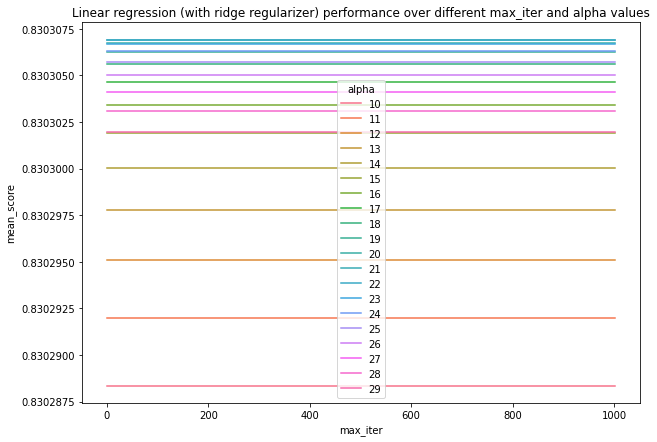

In [96]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='max_iter', y='mean_score', hue='alpha', data=Ridge_results_df)
plt.title('Linear regression (with ridge regularizer) performance over different max_iter and alpha values')
plt.show()

Now switching over to Lasso

Looking at hyperparameters one can optimize.

In [228]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

We will be considering 'alpha' and 'max_iter' hyperparameters.

Creating the pipeline.

Since we would like to see the significance of each of our features therefore we won't be doing any dimension reduction via principal component analysis.

In [229]:
Lasso_estimators = [('normalise', StandardScaler()),
                        ('model', Lasso())
                        ]
Lasso_pipe = Pipeline(Lasso_estimators)

Lasso_pipe

Pipeline(steps=[('normalise', StandardScaler()), ('model', Lasso())])

Defining the hyperparameter to optimize. As stated above we will be optimizing only alpha and max iteration hyperparameters.

In [230]:
Lasso_Param = { 'model': [Lasso()], 'model__alpha': [0.1, 1, 10, 50, 100, 150, 200, 250], 'model__max_iter': np.arange(1, 302, 25)}

Passing in the parameters to optimize to GridSearchCV. Also specifying cross validation steps equal to 5.

In [231]:
Grid_lasso= GridSearchCV(Lasso_pipe, param_grid = Lasso_Param, verbose=1, cv=5)

Fitting 'Grid_lasso' onto train sets.

In [232]:
Grid_lasso.fit(X_train, y_train)
#Takes 10 minutes.

Fitting 5 folds for each of 104 candidates, totalling 520 fits


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+14, tolerance: 2.597e+11
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.102e+14, tolerance: 2.578e+11
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e+14, tolerance: 2.612e+11
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+14, tolerance: 2.607e+11
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+14, tolerance: 2.618e+11
Objective did n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalise', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model': [Lasso(alpha=100, max_iter=126)],
                         'model__alpha': [0.1, 1, 10, 50, 100, 150, 200, 250],
                         'model__max_iter': array([  1,  26,  51,  76, 101, 126, 151, 176, 201, 226, 251, 276, 301])},
             verbose=1)

Getting R2 scores for the train and test sets.

In [233]:
Grid_lasso.score(X_train, y_train)

0.8396566922031484

In [234]:
Grid_lasso.score(X_test, y_test)

0.830115654187765

Looking at the key parameters that can be plotted using cv_results.

In [235]:
Grid_lasso.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model', 'param_model__alpha', 'param_model__max_iter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Creating a data frame so we can use seaborn for visualization. All relevant data is stored in the cv_results_ attribute of the GridSearchCV object

In [236]:
Lasso_results_df = pd.DataFrame({
    'alpha': Grid_lasso.cv_results_['param_model__alpha'].astype(str), # Casting to str so that seaborn treats it like a category, which is better for visuals.
    'max_iter': Grid_lasso.cv_results_['param_model__max_iter'],
    'mean_score': Grid_lasso.cv_results_['mean_test_score'],
})

Lasso_results_df.sort_values(by='mean_score', ascending=False).head(3)

,alpha,max_iter,mean_score
57,100,126,0.830285
58,100,151,0.830284
71,150,151,0.830284


Visualizing hyperparameters against mean score.

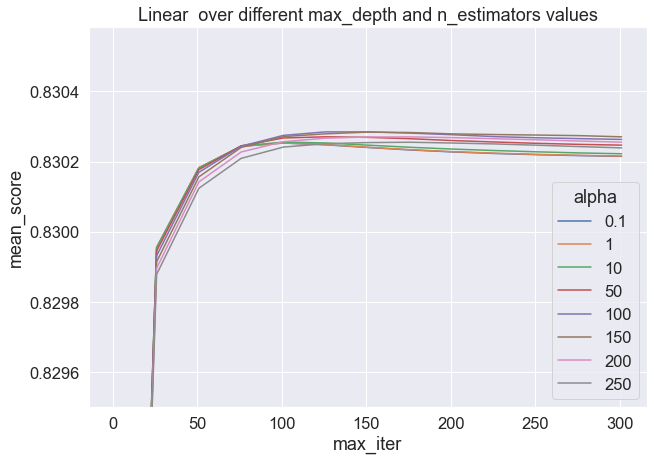

In [237]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='max_iter', y='mean_score', hue='alpha', data=Lasso_results_df)
plt.title('Lasso over different max_depth and n_estimators values')
plt.ylim(0.8295, 0.830585)
plt.show()

<u><b> Decision Tree

Let's see the R2 score for the Decision Tree without any hyperparameter optimization.

In [9]:
DTmodel = DecisionTreeRegressor()
DTmodel.fit(X_train, y_train)
 
print(f"DT R^2 score on training set: {DTmodel.score(X_train, y_train)}")
print(f"DT R^2 score on test set: {DTmodel.score(X_test, y_test)}")


DT R^2 score on training set: 1.0
DT R^2 score on test set: 0.8940768711261398


As seen from the score, there is a bit of over-fitting occurring on the train set.

Lets tune the hyperparameters for decision trees.

Decision trees do not require feature scaling to be performed as they are not sensitive to the the variance in the data [1]. Therefore we will be cancelling out this step while doing optimization.

In [10]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

We will be considering 'max_depth' and 'min_samples_leaf' hyperparameters.

Creating the pipeline.

Since we would like to see the significance of each of our features therefore we won't be doing any dimension reduction via principal component analysis.

In [11]:
DT_estimators = [('model', DecisionTreeRegressor())]
DT_pipe = Pipeline(DT_estimators)

DT_pipe

Pipeline(steps=[('model', DecisionTreeRegressor())])

Defining the hyperparameter to optimize. As stated above we will be optimizing only max depth and min samples leaf.

In [72]:
DT_Param = { 'model': [DecisionTreeRegressor()], 'model__max_depth': np.arange(1, 72, 2), 'model__min_samples_leaf': np.arange(1, 13, 3), 'model__max_leaf_nodes': np.arange(500, 751, 10)}

Passing in the parameters to optimize to GridSearchCV. Also specifying cross validation steps equal to 5.

In [73]:
Grid_DT= GridSearchCV(DT_pipe, param_grid = DT_Param, verbose=1, cv=5)

Fitting 'Grid_DT' onto train sets.

In [74]:
Grid_DT.fit(X_train, y_train)
#Takes 100 minutes.

Fitting 5 folds for each of 3744 candidates, totalling 18720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', DecisionTreeRegressor())]),
             param_grid={'model': [DecisionTreeRegressor(max_depth=49,
                                                         max_leaf_nodes=650)],
                         'model__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71]),
                         'model__max_leaf_nodes': array([500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620,
       630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750]),
                         'model__min_samples_leaf': array([ 1,  4,  7, 10])},
             verbose=1)

Getting R2 scores for the train and test sets.

In [82]:
Grid_DT.score(X_train, y_train)

0.9839412120588423

As seen there is considerable overfitting on the training set

In [83]:
Grid_DT.score(X_test, y_test)

0.8956696420081063

Looking at the key parameters that can be plotted using cv_results.

In [84]:
Grid_DT.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model', 'param_model__max_depth', 'param_model__max_leaf_nodes', 'param_model__min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Creating a data frame so we can use seaborn for visualization. All relevant data is stored in the cv_results_ attribute of the GridSearchCV object

In [85]:
DT_results_df = pd.DataFrame({
    'max_depth': Grid_DT.cv_results_['param_model__max_depth'].astype(str), # Casting to str so that seaborn treats it like a category, which is better for visuals.
    'min_samples_leaf': Grid_DT.cv_results_['param_model__min_samples_leaf'],
    'max_leaf_nodes' : Grid_DT.cv_results_['param_model__max_leaf_nodes'],
    'mean_score': Grid_DT.cv_results_['mean_test_score'],
})

DT_results_df.sort_values(by='mean_score', ascending=False).head(3)

,max_depth,min_samples_leaf,max_leaf_nodes,mean_score
2556,49,1,650,0.876515
2892,55,1,710,0.876362
1940,37,1,670,0.875427


Visualizing hyperparameters against mean score.

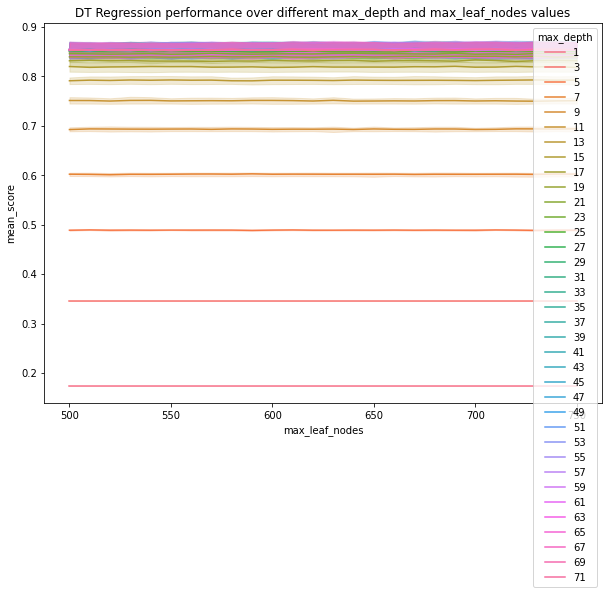

In [86]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='max_leaf_nodes', y='mean_score', hue='max_depth', data=DT_results_df)
plt.title('DT Regression performance over different max_depth and max_leaf_nodes values')
plt.show()

<u><b> Random Forrest

Let's see the R2 score for the Decision Tree without any hyperparameter optimization.

In [61]:
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)
 
print(f"DT R^2 score on training set: {RFmodel.score(X_train, y_train)}")
print(f"DT R^2 score on test set: {RFmodel.score(X_test, y_test)}")

DT R^2 score on training set: 0.9928352517531748
DT R^2 score on test set: 0.9519644727983538


As seen from the score, there is a bit of over-fitting occurring on the train set.

Lets tune the hyperparameters for random forest.

Random forrest does not require feature scaling to be performed is a tree-based mode and is not sensitive to the the variance in the data [2]. Therefore we will be cancelling out this step while doing optimization.

In [62]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

We will be considering 'max_depth' and 'min_samples_leaf' hyperparameters.

Creating the pipeline without and PCA implementation.

In [63]:
RF_estimators = [('model', RandomForestRegressor())]
RF_pipe = Pipeline(RF_estimators)

RF_pipe

Pipeline(steps=[('model', RandomForestRegressor())])

Defining the hyperparameter to optimize. As stated above we will be optimizing only max depth and min_samples_leaf hyperparameters.

In [64]:
RF_Param = { 'model': [RandomForestRegressor()], 'model__max_depth': np.arange(10, 51, 2), 'model__min_samples_leaf': np.arange(1, 32, 15)}

Passing in the parameters to optimize to GridSearchCV. Also specifying cross validation steps equal to 5.

In [65]:
Grid_RF= GridSearchCV(RF_pipe, param_grid = RF_Param, verbose=1, cv=5)

Fitting 'Grid_RF' onto train sets.

In [66]:
Grid_RF.fit(X_train, y_train)
#Takes 29 minutes.

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', RandomForestRegressor())]),
             param_grid={'model': [RandomForestRegressor(max_depth=42)],
                         'model__max_depth': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50]),
                         'model__min_samples_leaf': array([ 1, 16, 31])},
             verbose=1)

Getting R2 scores for the train and test sets.

In [67]:
Grid_RF.score(X_train, y_train)

0.9926840913988862

In [68]:
Grid_RF.score(X_test, y_test)

0.9526691961350504

Looking at the key parameters that can be plotted using cv_results.

In [69]:
Grid_RF.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model', 'param_model__max_depth', 'param_model__min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Creating a data frame so we can use seaborn for visualization. All relevant data is stored in the cv_results_ attribute of the GridSearchCV object

In [70]:
RF_results_df = pd.DataFrame({
    'max_depth': Grid_RF.cv_results_['param_model__max_depth'].astype(str), # Casting to str so that seaborn treats it like a category, which is better for visuals.
    'min_samples_leaf': Grid_RF.cv_results_['param_model__min_samples_leaf'],
    'mean_score': Grid_RF.cv_results_['mean_test_score'],
})

RF_results_df.sort_values(by='mean_score', ascending=False).head(3)

,max_depth,min_samples_leaf,mean_score
48,42,1,0.943314
33,32,1,0.943139
57,48,1,0.942781


Visualizing hyperparameters against mean score.

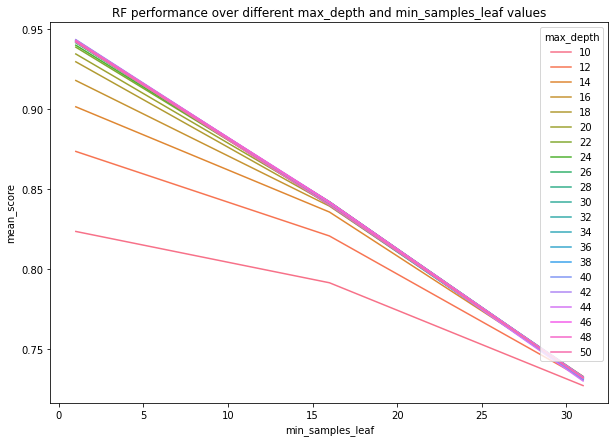

In [71]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='min_samples_leaf', y='mean_score', hue='max_depth', data=RF_results_df)
plt.title('RF performance over different max_depth and min_samples_leaf values')
plt.show()

<u><b>XGBoost

Let's see the R2 score for the Decision Tree without any hyperparameter optimization.

In [260]:
XGBmodel = xgb.XGBRegressor()
XGBmodel.fit(X_train, y_train)
 
print(f"DT R^2 score on training set: {XGBmodel.score(X_train, y_train)}")
print(f"DT R^2 score on test set: {XGBmodel.score(X_test, y_test)}")

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


DT R^2 score on training set: 0.9453935358313231
DT R^2 score on test set: 0.9169621002344591


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


As seen from the score, there is a bit of over-fitting occurring on the train set.

Lets tune the hyperparameters for XGBoost.

XGBoost do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [261]:
XGBRegressor().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

We will be considering 'max_depth' and 'min_samples_leaf' hyperparameters. Since XGBoost is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs either.

Creating the pipeline without and PCA implementation.

In [262]:
XGB_estimators = [('model', XGBRegressor(n_jobs = -1))]
XGB_pipe = Pipeline(XGB_estimators)

XGB_pipe

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, enable_categorical=False,
                              gamma=None, gpu_id=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

Defining the hyperparameter to optimize. As stated above we will be optimizing only max_depth and n_estimators hyperparameters.

In [263]:
XGB_Param = { 'model': [XGBRegressor()], 'model__n_estimators': np.arange(1, 202, 15), 'model__max_depth': np.arange(1, 18, 3), 'model__learning_rate': [0.1 , 1, 10]}

Passing in the parameters to optimize to GridSearchCV. Also specifying cross validation steps equal to 5.

In [264]:
Grid_XGB= GridSearchCV(XGB_pipe, param_grid = XGB_Param, verbose=1, n_jobs = -1, cv=5)

Fitting 'Grid_XGB' onto train sets.

In [265]:
Grid_XGB.fit(X_train, y_train)
#Takes 59 minutes.

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


One or more of the test scores are non-finite: [-1.81358784e+00  1.62848430e-01  2.95948626e-01  3.35214723e-01
  3.63018563e-01  3.86078518e-01  4.08217940e-01  4.26236004e-01
  4.43820590e-01  4.58705938e-01  4.73984129e-01  4.86766066e-01
  4.99089866e-01  5.10585652e-01 -1.76651189e+00  4.38081578e-01
  6.08600997e-01  6.49161771e-01  6.78596848e-01  7.04478361e-01
  7.24792507e-01  7.42727292e-01  7.57664162e-01  7.70533510e-01
  7.82362949e-01  7.93540114e-01  8.02860276e-01  8.11421303e-01
 -1.73220799e+00  6.42043211e-01  8.17063584e-01  8.42341354e-01
  8.55122721e-01  8.65572426e-01  8.74405906e-01  8.81918274e-01
  8.88133984e-01  8.93403125e-01  8.98081055e-01  9.02375044e-01
  9.06155320e-01  9.09546242e-01 -1.71576353e+00  7.35281831e-01
  8.98599399e-01  9.18064709e-01  9.22373162e-01  9.25192122e-01
  9.27619849e-01  9.29783932e-01  9.31811340e-01  9.33403205e-01
  9.34776815e-01  9.35907896e-01  9.37122970e-01  9.38255677e-01
 -1.70841998e+00  7.66138591e-01  9.1964131

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     enable_categorical=False,
                                                     gamma=None, gpu_id=None,
                                                     importance_type=None,
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                   

Getting R2 scores for the train and test sets.

In [266]:
Grid_XGB.score(X_train, y_train)

0.9985774842191601

In [267]:
Grid_XGB.score(X_test, y_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


0.957456007779722

Looking at the key parameters that can be plotted using cv_results.

In [268]:
Grid_XGB.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model', 'param_model__learning_rate', 'param_model__max_depth', 'param_model__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Creating a data frame so we can use seaborn for visualization. All relevant data is stored in the cv_results_ attribute of the GridSearchCV object

In [269]:
XGB_results_df = pd.DataFrame({
    'max_depth': Grid_XGB.cv_results_['param_model__max_depth'].astype(str), # Casting to str so that seaborn treats it like a category, which is better for visuals.
    'learning_rate': Grid_XGB.cv_results_['param_model__learning_rate'],
    'n_estimators': Grid_XGB.cv_results_['param_model__n_estimators'],
    'mean_score': Grid_XGB.cv_results_['mean_test_score'],
})

XGB_results_df.sort_values(by='mean_score', ascending=False).head(3)

,max_depth,learning_rate,n_estimators,mean_score
69,13,0.1,196,0.942499
68,13,0.1,181,0.942330
67,13,0.1,166,0.942149


Visualizing hyperparameters against mean score.

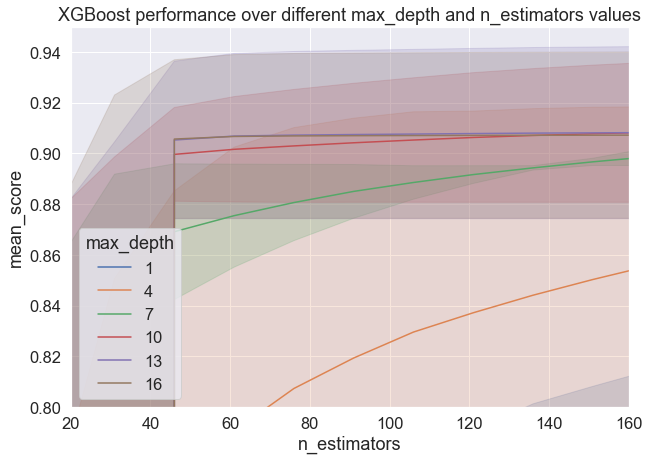

In [270]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='n_estimators', y='mean_score', hue='max_depth', data=XGB_results_df)
plt.ylim(0.8, 0.95)
plt.xlim(20, 160)
plt.title('XGBoost performance over different max_depth and n_estimators values')
plt.show()

Lets summarize the R2 values obtained for various models with and without hyperparameter tuning.

|Model No.|Model|R2 Value (Train set)|R2 Value (Test set)|
|---|---|---|---|
|1|Linear Regression (Without Regularization and Hyperparameter tuning)|0.8396|0.8301|
||Linear Regression (With Ridge Regularization and Hyperparameter tuning)|0.8396|0.8300|
||Linear Regression (With Lasso Regularization and Hyperparameter tuning)|0.8396|0.8301|
|2|Decision Tree (Without hyperparameter tuning)|0.1|0.8940|
||Decision Tree (With hyperparameter tuning)|0.9994|0.8956|
|3|Random Forrest (Without hyperparameter tuning)|0.9928|0.9519|
||Random Forrest (With hyperparameter tuning)|99.26|0.9526|
|4|XGBoost (Without hyperparameter tuning)|0.9453|0.9169|
||XGBoost (With hyperparameter tuning)|0.9985|0.9574|

As seen, implementing linear regression with and without regularization yields same R2 results, thus one could simply implement linear regression without any regularization and hyperparameter tuning. The highest R2 value was obtained for XGBoost i.e. 95.74% when implemented of the test set.

### Model Evaluation

Note: No validation step is incorporated as the R2 scores obtained after Grid search and cross validation are somewhat close when using simpler models with the inclusion of optimized hyperparameter values, as seen below.

<b> Linear Regression with Lasso Regularization

Scaling X test and train sets.

In [271]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Implementing simple linear regression model with L2 regularization and optimized hyperparameter values. Fitting the model and obtained R2 score for test and train sets.

In [272]:
Lassomodel2 = Lasso(alpha = 100, max_iter=126)
Lassomodel2.fit(X_train_scaled, y_train)

print(f"Lasso R^2 score on training set: {Lassomodel2.score(X_train_scaled, y_train)}")
print(f"Lasso R^2 score on test set: {Lassomodel2.score(X_test_scaled, y_test)}")

Lasso R^2 score on training set: 0.8396566922031484
Lasso R^2 score on test set: 0.830115654187765


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+14, tolerance: 3.253e+11


Predicting yield (y value) from X_test_scaled.

In [273]:
y_test_predict_Lasso = Lassomodel2.predict(X_test_scaled)

Calculating mean squared error.

In [274]:
mean_squared_error(y_test, y_test_predict_Lasso)

74643222706.56123

Calculating mean absolute percentage error.

In [275]:
mean_absolute_percentage_error(y_test, y_test_predict_Lasso)

0.36558543017106127

Calculating median absolute error.

In [276]:
median_absolute_error(y_test, y_test_predict_Lasso)

127923.84642722062

Calculating residuals from the y_test and predicted y_test.

In [277]:
residual_Lasso = y_test - y_test_predict_Lasso

Plotting residuals vs the predicted y_test value (i.e. Total Yield)

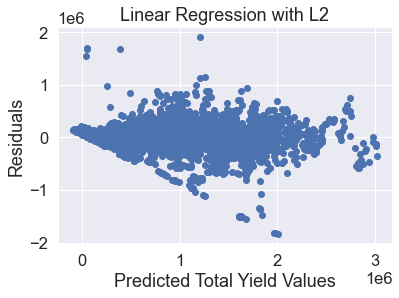

In [278]:
plt.figure() 
plt.scatter(y_test_predict_Lasso, residual_Lasso) 
plt.xlabel('Predicted Total Yield Values') 
plt.ylabel('Residuals')
plt.title('Linear Regression with L2') 
plt.show()

<b> Decision Trees

Implementing Decision Tree regression model with optimized hyperparameter values. Fitting the model and obtained R2 score for test and train sets.

In [97]:
DTmodel2 = DecisionTreeRegressor(max_depth = 49, min_samples_leaf=1, max_leaf_nodes=650)
DTmodel2.fit(X_train, y_train)

print(f"DT R^2 score on training set: {DTmodel2.score(X_train, y_train)}")
print(f"DT R^2 score on test set: {DTmodel2.score(X_test, y_test)}")

DT R^2 score on training set: 0.9839412120588423
DT R^2 score on test set: 0.8931136927729706


Predicting yield (y value) from X_test_scaled.

In [98]:
y_test_predict_DT = DTmodel2.predict(X_test)

Calculating mean squared error.

In [99]:
mean_squared_error(y_test, y_test_predict_DT)

46963352606.055626

Calculating mean absolute percentage error.

In [100]:
mean_absolute_percentage_error(y_test, y_test_predict_DT)

0.17197686766688025

Calculating median absolute error.

In [101]:
median_absolute_error(y_test, y_test_predict_DT)

62494.94534942752

Calculating residuals from the y_test and predicted y_test.

In [102]:
residual_DT = y_test - y_test_predict_DT

Plotting residuals vs the predicted y_test value (i.e. Total Yield)

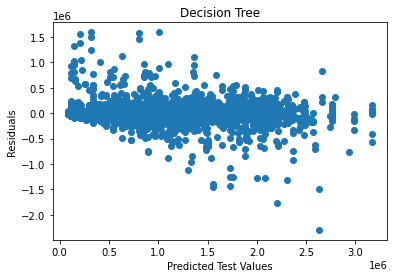

In [103]:
plt.figure() 
plt.scatter(y_test_predict_DT, residual_DT) 
plt.xlabel('Predicted Test Values') 
plt.ylabel('Residuals') 
plt.title('Decision Tree')
plt.show()

<b> Random Forrest

Implementing Random Forrest regression model with optimized hyperparameter values. Fitting the model and obtained R2 score for test and train sets.

In [75]:
RFmodel2 = RandomForestRegressor(max_depth = 42, min_samples_leaf=1)
RFmodel2.fit(X_train, y_train)

print(f"RF R^2 score on training set: {RFmodel2.score(X_train, y_train)}")
print(f"RF R^2 score on test set: {RFmodel2.score(X_test, y_test)}")

RF R^2 score on training set: 0.992872923479428
RF R^2 score on test set: 0.9536825740828254


Predicting yield (y value) from X_test_scaled.

In [76]:
y_test_predict_RF = RFmodel2.predict(X_test)

Calculating mean squared error.

In [77]:
mean_squared_error(y_test, y_test_predict_RF)

20350797605.280727

Calculating mean absolute percentage error.

In [78]:
mean_absolute_percentage_error(y_test, y_test_predict_RF)

0.12768067613668055

Calculating median absolute error.

In [79]:
median_absolute_error(y_test, y_test_predict_RF)

49680.509536767146

Calculating residuals from the y_test and predicted y_test.

In [80]:
residual_RF = y_test - y_test_predict_RF

Plotting residuals vs the predicted y_test value (i.e. Total Yield)

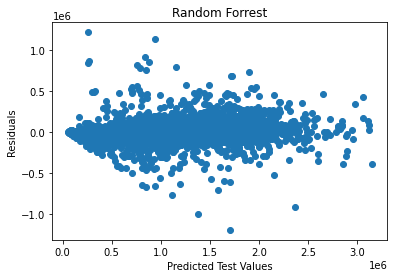

In [81]:
plt.figure() 
plt.scatter(y_test_predict_RF, residual_RF) 
plt.xlabel('Predicted Test Values') 
plt.ylabel('Residuals')
plt.title('Random Forrest')
plt.show()

<b> XGBoost

Implementing XGBoost regression model with optimized hyperparameter values. Fitting the model and obtained R2 score for test and train sets.

In [293]:
XGBmodel2 = xgb.XGBRegressor(max_depth = 13, learning_rate=0.1, n_estimators=196)
XGBmodel2.fit(X_train, y_train)

print(f"Lasso R^2 score on training set: {XGBmodel2.score(X_train, y_train)}")
print(f"Lasso R^2 score on test set: {XGBmodel2.score(X_test, y_test)}")

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Lasso R^2 score on training set: 0.9985774842191601
Lasso R^2 score on test set: 0.957456007779722


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Predicting yield (y value) from X_test_scaled.

In [294]:
y_test_predict_XGB = XGBmodel2.predict(X_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Calculating mean squared error.

In [295]:
mean_squared_error(y_test, y_test_predict_XGB)

18692838771.821194

Calculating mean absolute percentage error.

In [296]:
mean_absolute_percentage_error(y_test, y_test_predict_XGB)

0.11953189957318625

Calculating median absolute error.

In [297]:
median_absolute_error(y_test, y_test_predict_XGB)

48255.38666964206

Calculating residuals from the y_test and predicted y_test.

In [298]:
residual = y_test - y_test_predict_XGB

Plotting residuals vs the predicted y_test value (i.e. Total Yield)

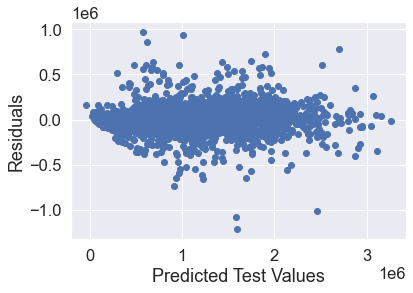

In [299]:
plt.figure() 
plt.scatter(y_test_predict_XGB, residual) 
plt.xlabel('Predicted Test Values') 
plt.ylabel('Residuals')
plt.show()

In terms of residuals almost all the models demonstrated similar characteristics.

<u> Summary

Looking at the summary table:

|Model|R2 Score (Train Set)|R2 Score (Test Set)|Mean Squared Error|Mean Absolute Percentage Error|Median Absolute Error|
|----|----|----|----|----|----|
|Linear Regression (L2)|0.8396|0.8301|74.64e9|0.3655|12.79e4|
|Decision Trees|0.983|0.893|46.96e9|0.1719|6.24e4|
|Random Forrest|0.9928|0.9536|20.35e9|0.1227|4.96e4|
|XGBoost|0.9985|0.9574|18.69e9|0.1195|4.82e4|


As seen above XGboost, turned out the have the highest R2 score on the test set as well lowest values of mean squared error as well as mean absolute percentage error.

### Model Interpretation

To further proceed with the model interpretation, two models will be selected i.e. the simplest model i.e. Linear regression with lasso regularization (as severe co-linearity exists between various variables, however it doesn't matter) and the one with the highest R2 value on the test set i.e. XGBoost.

<b> Lasso Regularization model interpretation

Looking at the coef_ value for the the implemented Lasso regression model.

In [300]:
# Coefficient values
Lassomodel2.coef_

array([ 85572.97933015,  89619.90645507, -25751.93566814, 100235.98761012,
       -25499.77250487,   5081.93063309, -31232.44043309,   8843.19825468,
         8606.2010258 , 121539.52701168, -90422.04028866,  21687.39084936,
       -16886.65707298, -21482.72818576, -45301.44482089,   1343.59408878,
       -39315.76095174,  38444.00587308, -18641.98726033,  86251.74831027,
        23591.15538111, -21899.00535274, -18240.38038871, -37114.06967532,
        10399.60087028,  32363.85416488, -12708.07155025,  27562.96392863,
        30695.65196267,  18212.17801785, -30216.67025895, -29772.99999718,
         4351.85084799, -26290.67589533, -56698.4589222 ,    482.17134548,
       -63920.60557711, -27538.17148324,  61479.6232635 ,  16812.94939294,
       -29230.27654498,  -3479.29765042, -39306.88286221, -28084.91030546,
       -52900.82521989,  59125.64775653,  11871.76884095, -23282.88668119,
       -45417.79721471,  83508.65429405, -44935.60205511,  67731.31854466,
       -56852.39149121,  

Storing the variables together with their coefficients in a dataframe.

In [301]:
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficients': Lassomodel2.coef_})
coef_df.sort_values(by='Coefficients', ascending=False, inplace=True, ignore_index=True) # Sort coefficients in descending order
coef_df

,Variable,Coefficients
0,Peru,134418.707702
1,Roundwood Production (m3),121539.527012
2,Ethiopia PDR,105696.459568
3,Eswatini,102075.763251
4,Nitrogen Usage (Tonnes),100235.987610
...,...,...
211,Tuvalu,-61392.082401
212,USSR,-61847.033547
213,Brunei Darussalam,-63920.605577
214,Djibouti,-66287.032349


Filtering out the columns with orignial features and not the one-hot encoded ones.

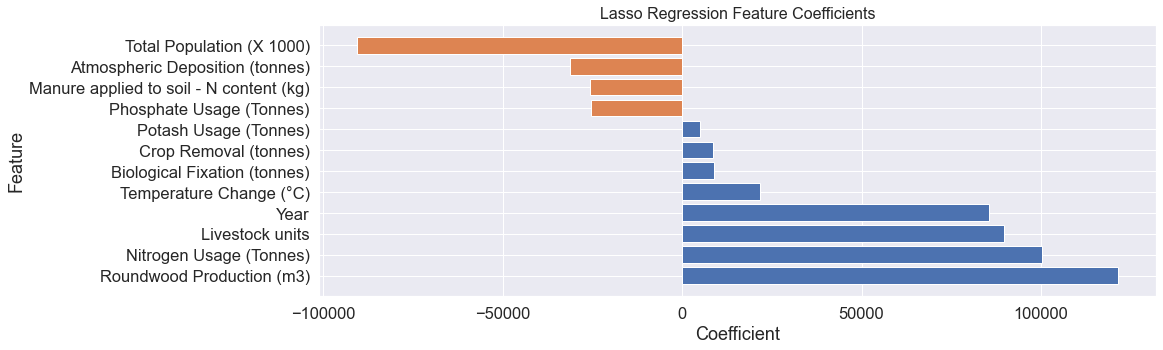

In [303]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
positive_coefs = coef_df.loc[(coef_df['Coefficients'] >=0) & ((coef_df['Variable'] == 'Year') | (coef_df['Variable'] == 'Livestock units') | (coef_df['Variable'] == 'Manure applied to soil - N content (kg)') | (coef_df['Variable'] == 'Nitrogen Usage (Tonnes)') | (coef_df['Variable'] == 'Phosphate Usage (Tonnes)') | (coef_df['Variable'] == 'Potash Usage (Tonnes)') | (coef_df['Variable'] == 'Atmospheric Deposition (tonnes)') | (coef_df['Variable'] == 'Biological Fixation (tonnes)') | (coef_df['Variable'] == 'Crop Removal (tonnes)') | (coef_df['Variable'] == 'Roundwood Production (m3)') | (coef_df['Variable'] == 'Total Population (X 1000)') | (coef_df['Variable'] == 'Temperature Change (°C)'))]
plt.barh(positive_coefs['Variable'], positive_coefs['Coefficients'])
negative_coefs = coef_df.loc[(coef_df['Coefficients'] < 0) & ((coef_df['Variable'] == 'Year') | (coef_df['Variable'] == 'Livestock units') | (coef_df['Variable'] == 'Manure applied to soil - N content (kg)') | (coef_df['Variable'] == 'Nitrogen Usage (Tonnes)') | (coef_df['Variable'] == 'Phosphate Usage (Tonnes)') | (coef_df['Variable'] == 'Potash Usage (Tonnes)') | (coef_df['Variable'] == 'Atmospheric Deposition (tonnes)') | (coef_df['Variable'] == 'Biological Fixation (tonnes)') | (coef_df['Variable'] == 'Crop Removal (tonnes)') | (coef_df['Variable'] == 'Roundwood Production (m3)') | (coef_df['Variable'] == 'Total Population (X 1000)') | (coef_df['Variable'] == 'Temperature Change (°C)'))]
plt.barh(negative_coefs['Variable'], negative_coefs['Coefficients'])
plt.title('Lasso Regression Feature Coefficients', fontsize=16)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

As seen above, roundwood production, nitrogen usage as well livestock units tend to have the highest positive yield coefficients. This means if the quantity of these parameters increases the yield also increases. On the other hand total population column was observed to have the highest negative temperature coefficient. According to Guzman et al. agriculture dedicated area play a key role in determining the crop production in a certain area [3]. This gets threatened by increased population growth owing increased conversion of agricultural land into urban land. Interesting, temperature change turned out to have a positive yield coefficient. This might true owing to the fact that the highest climate change was observed in the case of European countries. Thus over the years, the climate of European has become more suitable for crop growth.

Lets look at the top ten one-hot encoded countries having highest yield coefficients.

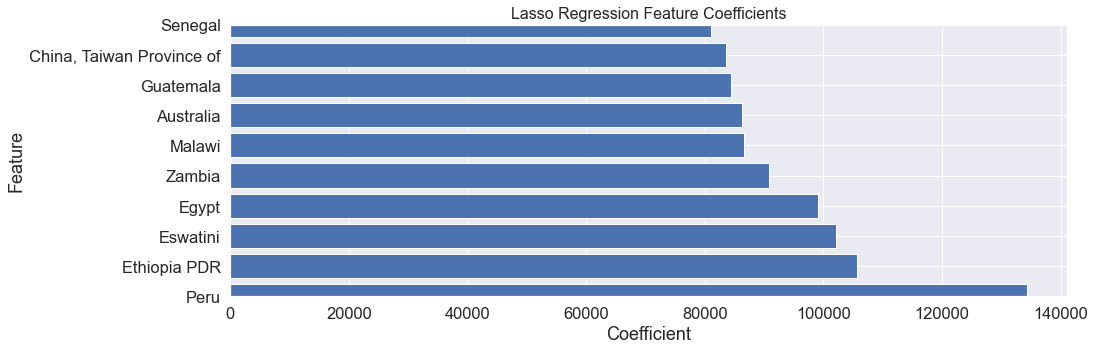

In [304]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
positive_coefs = coef_df.loc[(coef_df['Coefficients'] >=0) & (coef_df['Variable'] != 'Year') & (coef_df['Variable'] != 'Livestock units') & (coef_df['Variable'] != 'Manure applied to soil - N content (kg)') & (coef_df['Variable'] != 'Nitrogen Usage (Tonnes)') & (coef_df['Variable'] != 'Phosphate Usage (Tonnes)') & (coef_df['Variable'] != 'Potash Usage (Tonnes)') & (coef_df['Variable'] != 'Atmospheric Deposition (tonnes)') & (coef_df['Variable'] != 'Biological Fixation (tonnes)') & (coef_df['Variable'] != 'Crop Removal (tonnes)') & (coef_df['Variable'] != 'Roundwood Production (m3)') & (coef_df['Variable'] != 'Total Population (X 1000)') & (coef_df['Variable'] != 'Temperature Change (°C)')]
plt.barh(positive_coefs['Variable'], positive_coefs['Coefficients'])
plt.title('Lasso Regression Feature Coefficients', fontsize=16)
plt.ylim(0,9)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

As seen above, Peru turned out to have the highest yield coefficient. This is understandable as Peru has the highest crop yield in the world as seen previously. Many of the African countries that were seen to have the one of the highest yield previously turned out have the highest yield coefficients. This mean that these countries tend to have a positive impact on global crop yield. This might be due to smart agricultural policies, suitable climate, availability to water resources, etc.

Looking at the one-hot encoded countries with the lowest yield coefficients.

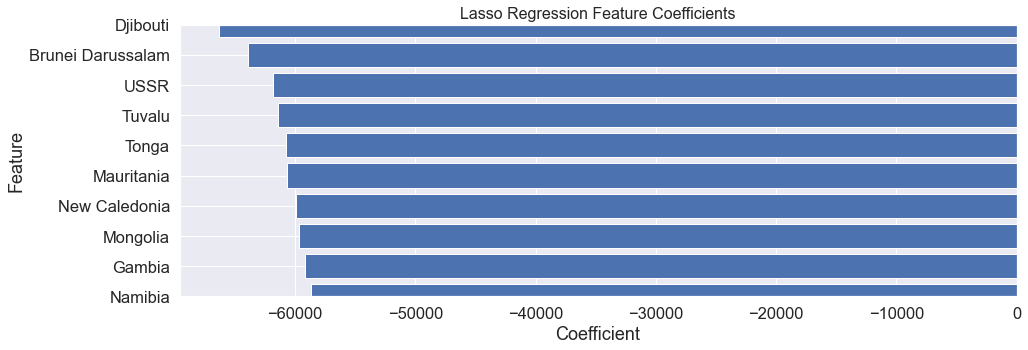

In [305]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
positive_coefs = coef_df.loc[(coef_df['Coefficients'] < 0) & (coef_df['Variable'] != 'Year') & (coef_df['Variable'] != 'Livestock units') & (coef_df['Variable'] != 'Manure applied to soil - N content (kg)') & (coef_df['Variable'] != 'Nitrogen Usage (Tonnes)') & (coef_df['Variable'] != 'Phosphate Usage (Tonnes)') & (coef_df['Variable'] != 'Potash Usage (Tonnes)') & (coef_df['Variable'] != 'Atmospheric Deposition (tonnes)') & (coef_df['Variable'] != 'Biological Fixation (tonnes)') & (coef_df['Variable'] != 'Crop Removal (tonnes)') & (coef_df['Variable'] != 'Roundwood Production (m3)') & (coef_df['Variable'] != 'Total Population (X 1000)') & (coef_df['Variable'] != 'Temperature Change (°C)')]
plt.barh(positive_coefs['Variable'], positive_coefs['Coefficients'])
plt.title('Lasso Regression Feature Coefficients', fontsize=16)
plt.ylim(100, 109)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

One could see numerous african countries having the highest negative coefficients. In addition, one could also see non-african countries in the list such as Mongolia, where less than 1 percent of the land is arable [4]. Similar is the case with USSR which was the largest country by area yet had the lowest yield owing numerous factors e.g. not ideal climate for crop growth.

<b> XGBoost Interpretation

One could make use of 'SHAP' library to interpret XBoost model outcomes.

The first step is to fit an 'explainer' model with the fitted model. The explainer calculates the Shapley values for each feature and each data point in the dataset

In [306]:
%%time 
# This calculation will take 2-3 minutes!

# Fit tree-specific kernel for SHAP  
explainer = shap.TreeExplainer(XGBmodel2)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


CPU times: total: 8min 18s
Wall time: 2min 18s


One could pinpoint the a single row for interpretation by using force_plot method. Doing this for the first row in the training set.

In [307]:
# Initiate Javascript for visualization 
shap.initjs()

# Plot SHAP values for row 0 
shap.force_plot(explainer.expected_value,       # Plots the average prediction on the plot
                shap_values[0],                 # Plots the Shapley values on the force plot 
                features=X_train.iloc[0],       # 'features' displays the value that is passed to it on the plot; feature value plotted for easier interpretation
                feature_names=X_train.columns)  # 'feature_names' displays the name of the features

As seen above, is case of the 1st data row, total population, livestock units and atmospheric deposition turned out to have a negative impact on crop yield. This is indicated by the blue arrow lines. The magnitude of the arrow lines indicate the significance of the feature (or Shapley Value). On the other hand potash usage and crop removal turned out to have a positive influence on the crop yield.

One could make use of Shaply values to look at the global feature importance.

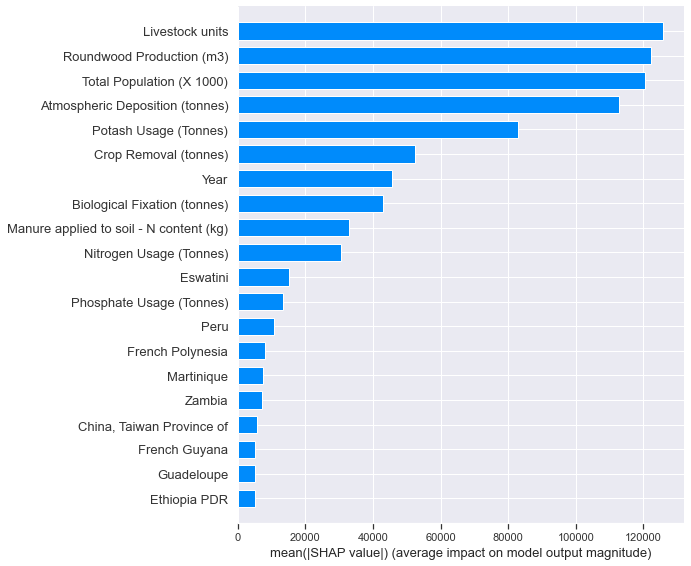

In [309]:
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

As seen above livestock, roundwood production and total population turned out to be the greatest average contributor to the yield. Interestingly there is no mention of temperature in the above graph, signifying its low importance in determining crop yield. This is surprising.

One could also look athe summary plot for the global interpretation.

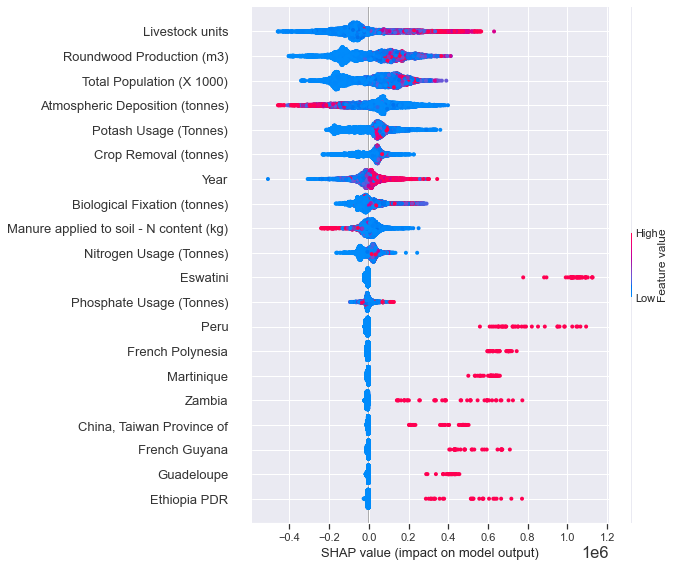

In [308]:
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

As seen above, each point in the summary plot is the Shaply value for a feature and prediction. The features are represented on the y-axis while x-axis shows the Shapley values. The color of the points represent value of the features. In the current case having a higher livestock units has a positive impact on crop yield. On the other hand having lower atmospheric deposition values turned out to have a positive effect. The sweet spot in case of population is quite small as seen by the red dots, therefore it indicates that the relationship between population and crop yield is a complex one and one needs to strike a balance in terms of population to achieve maximum yield.

### Conclusion:

One-hot encoding was implemented to convert the 'area' categorical column to numeric equivalent. Later on hyperparameter optimization was carried out for a total of four models. XGBoost model turned out to have the highest R2, mean squared error as well as mean absolute percentage error. This signifies it superiority over other models. When interpreting the lasso regression and XGboost models, it was quite evident that population tends to play an profound role in the determination of crop yield. The relationship between population and crop yield turned out to be a complex one as seen from the XGboost model interpretation. When it comes to temperature change, it seems that it does have a slightly positive effect (if any) on crop yield. This might be due to the fact that highest temperature change values were observed for European countries, thereby providing them a more suitable climate for crop growth.

### References:
[1] Thenraj P. Do decision trees need feature scaling? [Internet]. Medium. Towards Data Science; 2020 [cited 2022Apr4]. Available from: https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

[2] Fernandez J. How data normalization affects your random forest algorithm [Internet]. Medium. Towards Data Science; 2021 [cited 2022Apr4]. Available from: https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf

[3] Olimar EM, Guzman M. Food Security and Population Growth in the 21 st Century. E-International Relations publishing. www. e-ir. info/2011/07/18/food-security-and-populationgrowth-in-the-21st-century. Prasad, Krishna Nandan.(2007), Population Growth and Food Grain Production in Tribal Dominated Manpur Tahsil of Chhatisgarh, Hill Geographer. 2011;23(1&2):28-41.

[4] Project B. Sustainable Agriculture in Mongolia affected by harsh winters [Internet]. The Borgen Project. Borgen Project https://borgenproject.org/wp-content/uploads/The_Borgen_Project_Logo_small.jpg; 2019 [cited 2022Apr4]. Available from: https://borgenproject.org/sustainable-agriculture-in-mongolia/ 